<a href="https://colab.research.google.com/github/obeabi/SdsOctober2020Challenge/blob/main/Main_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #2 - Used Car Prices
## 2021-01-12

### In this notebook a Neural Network is used to fit and predict used car price

This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Step 1: Data Preprocessing 

In [379]:
# Importing the libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
tf.__version__
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [380]:
# Establish tensorflow version imported
tf.__version__

'2.4.0'

In [381]:
# Importing the training dataset

df_train = pd.read_csv('df_train_se2.csv', engine= 'python', encoding= 'latin1')

# drop first column
df_train.drop(['Unnamed: 0', 'duration_listed'], axis = 1, inplace = True)

df_train.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price_usd,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
0,245000,2006,0,1.6,0,1,0,0,0,0,0,0,0,0,0,4250.0,20,612,1,1,3,2,2,2,1
1,265542,2002,0,3.3,0,0,1,0,0,0,0,0,0,0,0,4000.0,24,226,0,8,3,2,6,2,1
2,168000,2009,0,1.8,0,0,0,0,1,0,0,1,1,1,1,10900.0,20,395,1,1,0,0,6,2,1
3,225522,2008,0,1.8,0,0,1,1,0,0,1,0,0,1,1,6999.0,18,538,1,6,3,2,10,2,1
4,370000,1991,0,1.8,0,0,0,0,0,0,0,0,0,0,1,1600.0,29,101,1,0,3,2,8,2,1


In [382]:
# print shape and check for missing values
print(df_train.shape)
print(df_train.isnull().sum().sum())

(30824, 25)
0


In [383]:
# Importing the test dataset

df_test = pd.read_csv('df_test_se2.csv', engine= 'python', encoding= 'latin1')

# drop first column
df_test.drop(['Unnamed: 0', 'duration_listed'], axis = 1, inplace = True)

df_test.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
0,360000,1997,0,1.6,0,0,1,0,0,0,0,0,1,0,1,16,210,1,1,3,2,1,2,1
1,267000,1999,0,1.4,0,0,0,0,0,0,0,0,0,0,1,13,167,1,8,3,2,2,2,1
2,172000,2000,0,2.0,0,1,0,0,0,0,0,0,0,0,0,26,417,1,1,3,2,6,2,1
3,230000,2009,0,2.4,0,0,1,1,1,0,1,1,1,1,1,37,675,1,10,0,0,10,2,1
4,206000,2007,0,1.6,0,0,1,0,1,0,1,0,0,0,0,18,398,1,8,3,2,8,2,1


In [384]:
# print shape and number of total missing values
print(df_test.shape)
print(df_test.isnull().sum().sum())

(7707, 24)
0


In [385]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [386]:
# Specify label column name here
label = 'price_usd'



# Rearrage the dataset columns
cols = df_train.columns.tolist()
colIdx = df_train.columns.get_loc(label)
# Do nothing if the label is in the 0th position
# Otherwise, change the order of columns to move label to 0th position
if colIdx != 0:
    cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
    #cols =  cols[0:colIdx] + cols[colIdx:colIdx+1]
# Change the order of data so that label is in the 0th column
modified_df_train = df_train[cols]

modified_df_train.head()

,price_usd,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
0,4250.0,245000,2006,0,1.6,0,1,0,0,0,0,0,0,0,0,0,20,612,1,1,3,2,2,2,1
1,4000.0,265542,2002,0,3.3,0,0,1,0,0,0,0,0,0,0,0,24,226,0,8,3,2,6,2,1
2,10900.0,168000,2009,0,1.8,0,0,0,0,1,0,0,1,1,1,1,20,395,1,1,0,0,6,2,1
3,6999.0,225522,2008,0,1.8,0,0,1,1,0,0,1,0,0,1,1,18,538,1,6,3,2,10,2,1
4,1600.0,370000,1991,0,1.8,0,0,0,0,0,0,0,0,0,0,1,29,101,1,0,3,2,8,2,1


In [387]:
# Check shape of bith train sets
print("Original test set shape is :" , df_train.shape)
print("Modified test set shape is :" , modified_df_train.shape)

Original test set shape is : (30824, 25)
Modified test set shape is : (30824, 25)


In [388]:
# Adjust test set also
test_list_columns = modified_df_train.columns[1:]

modified_df_test = df_test[test_list_columns]
modified_df_test.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
0,360000,1997,0,1.6,0,0,1,0,0,0,0,0,1,0,1,16,210,1,1,3,2,1,2,1
1,267000,1999,0,1.4,0,0,0,0,0,0,0,0,0,0,1,13,167,1,8,3,2,2,2,1
2,172000,2000,0,2.0,0,1,0,0,0,0,0,0,0,0,0,26,417,1,1,3,2,6,2,1
3,230000,2009,0,2.4,0,0,1,1,1,0,1,1,1,1,1,37,675,1,10,0,0,10,2,1
4,206000,2007,0,1.6,0,0,1,0,1,0,1,0,0,0,0,18,398,1,8,3,2,8,2,1


In [389]:
# Check shape of test set
print("Original test set shape is :" , df_test.shape)
print("Modified test set shape is :" , modified_df_test.shape)

Original test set shape is : (7707, 24)
Modified test set shape is : (7707, 24)


In [390]:
# Create X and y from train set
X = modified_df_train.iloc[:, 1:].values
y = modified_df_train.iloc[:, 0].values
X_test = modified_df_test.iloc[:,:].values
y = y.reshape(len(y),1)
print(X[0:1])

print("*"*30)
print(y[0:2])
print("*"*30)
print(X_test[0:1])

[[2.45e+05 2.01e+03 0.00e+00 1.60e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.00e+01
  6.12e+02 1.00e+00 1.00e+00 3.00e+00 2.00e+00 2.00e+00 2.00e+00 1.00e+00]]
******************************
[[4250.]
 [4000.]]
******************************
[[3.6e+05 2.0e+03 0.0e+00 1.6e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 1.6e+01 2.1e+02 1.0e+00
  1.0e+00 3.0e+00 2.0e+00 1.0e+00 2.0e+00 1.0e+00]]


In [391]:
# Splitting the dataset into the Training set and Validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.08, random_state = 0)

In [392]:
# Feature Scaling
sc = MinMaxScaler(feature_range= (0,1))
sc_y = MinMaxScaler(feature_range= (0,1))

# Features columns
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

# target columns
y_train = sc_y.fit_transform(y_train)
y_validation = sc_y.transform(y_validation)


In [393]:
# Let's print X_train
print(X_train)

[[0.34 0.51 0.   ... 0.73 1.   0.5 ]
 [0.31 0.71 0.   ... 0.18 1.   0.5 ]
 [0.22 0.86 0.   ... 0.73 1.   0.5 ]
 ...
 [0.26 0.84 0.   ... 0.18 1.   0.5 ]
 [0.28 0.77 0.   ... 0.91 1.   0.5 ]
 [0.1  0.93 0.   ... 0.45 1.   0.5 ]]


## Building  ANN 

In [394]:
# Import keras libraries
from keras.layers import  Dropout,Flatten,Dense,Activation, BatchNormalization

In [395]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [396]:
# Adding the input layer and the first hidden layer
ann.add(Dense(units=32, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))

In [397]:
# Adding the second hidden layer
ann.add(Dense(units=16, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))

In [398]:
# Adding the output layer
ann.add(Dense(units=1, activation=None))

## Training the ANN

In [399]:
# Compiling the ANN
ann.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 2**5, epochs = 30,  validation_data=(X_validation, y_validation))

Epoch 1/30
887/887 [==============================] - 2s 2ms/step - loss: 0.4757 - val_loss: 0.0054
Epoch 2/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 3/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 4/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0048 - val_loss: 0.0036
Epoch 5/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 6/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 7/30
887/887 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 8/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 9/30
887/887 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 10/30
887/887 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0025

##  Making Predictions on ANN

In [400]:
# Make prediction on validation and test set
y_hat_validation = ann.predict(X_validation)
y_pred = ann.predict(X_test)
y_hat_validation = sc_y.inverse_transform(y_hat_validation)
y_validation = sc_y.inverse_transform(y_validation)
y_pred = sc_y.inverse_transform(y_pred)
np.set_printoptions(precision=2)
print(np.concatenate((y_hat_validation.reshape(len(y_hat_validation),1), y_validation.reshape(len(y_validation),1)),1))

[[13022.78  9100.  ]
 [ 2732.84  2950.  ]
 [18264.02 23900.  ]
 ...
 [11357.05 10196.34]
 [ 3899.19  4500.  ]
 [14318.9  14500.  ]]


In [401]:
# Using scikit learn to evaluate performance
from sklearn.metrics import  r2_score, mean_squared_error
mse = mean_squared_error(y_hat_validation, y_validation)
print("The r2_score on validation set is :", r2_score(y_hat_validation, y_validation))
print("The mean squared error (MSE) on validation set is :", mse)
print("The root mean squared error (RMSE) on validation set is :", np.sqrt(mse))

The r2_score on validation set is : 0.8164742444853221
The mean squared error (MSE) on validation set is : 6598791.949038474
The root mean squared error (RMSE) on validation set is : 2568.8113883737115


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


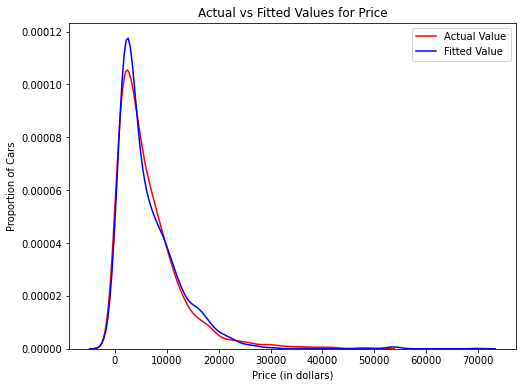

In [409]:
# Let's visualize the fit
plt.figure(figsize=(8, 6))


ax1 = sns.distplot(y_validation, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_validation, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend(['Actual Value','Fitted Value'])

plt.show()
plt.close()

## # Conclusion: The model evaluation metrics on the validation set  are summarized as follows
* target encoding: r2_score = 0.84 , mse = 6013449 , rmse = 2452
* count encoding:  r2_score= 0.78 , mse = 6334479 , rmse = 2516 
* selective encoding:  r2_score= 0.77 , mse = 6359849, rmse = 2521
* selective encoding2 :  r2_score= 0.85 , mse = 5396513, rmse = 2323

### Save ANN Model

In [403]:
# Save model
ann.save("Carprice_20epochs.h5")